In [2]:
import numpy as np
from numpy import polyval
import matplotlib.pyplot as plt
import scipy as scp  
from scipy.optimize import curve_fit

In [3]:
# Calibration
I_c, B_c, B_std_c = np.loadtxt('../Hall Effect/Calibration.csv', delimiter=',', skiprows=3, usecols=(0, 4, 5), unpack=True)
B_c = B_c*1e-3
B_std_c = B_std_c*1e-3

# Magnetic Field
B_I, V1_B, V1_std_B, V2_B, V2_std_B = np.loadtxt('../Hall Effect/Magnetic_Field.csv', delimiter=',', skiprows=6, unpack=True)

# Probe Current 
I, V0_I, V1_I, V1_std_I, V2_I, V2_std_I = np.loadtxt('../Hall Effect/Probe_Current.csv', delimiter=',', skiprows=5, unpack=True)
i = 0
I, V0_I, V1_I, V1_std_I, V2_I, V2_std_I = I[i:], V0_I[i:], V1_I[i:], V1_std_I[i:], V2_I[i:], V2_std_I[i:]

# Temperature
T, V0_T, V1_T, V1_std_T, V2_T, V2_std_T = np.loadtxt('../Hall Effect/Temperature.csv', delimiter=',', skiprows=3, unpack=True)

[[ 8.54556832e-08 -1.51957016e-07]
 [-1.51957016e-07  3.85680971e-07]]


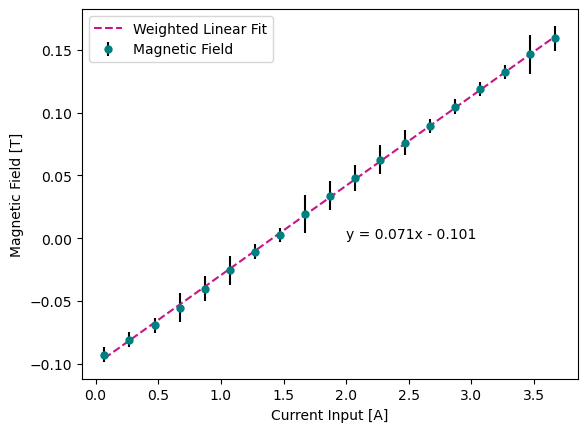

In [4]:
#Calibration

p1, c1 = np.polyfit(I_c, B_c, 1, w=1/B_std_c, cov=True)

print(c1)

s1 = p1[0]
s1_err = np.sqrt(c1[0][0])

plt.errorbar(I_c, B_c, yerr=B_std_c*10, color='teal', ecolor='k', ms=5, fmt='o', label='Magnetic Field')
plt.plot(I_c, polyval(p1, I_c), color='mediumvioletred', ls='--', label='Weighted Linear Fit')
plt.text(2, 0, f'y = {np.round(p1[0], 3)}x - {np.abs(np.round(p1[1], 3))}')
plt.xlabel('Current Input [A]')
plt.ylabel('Magnetic Field [T]')
plt.legend()
plt.show()

s2 = 197.74614284616987+-0.9026505011907195


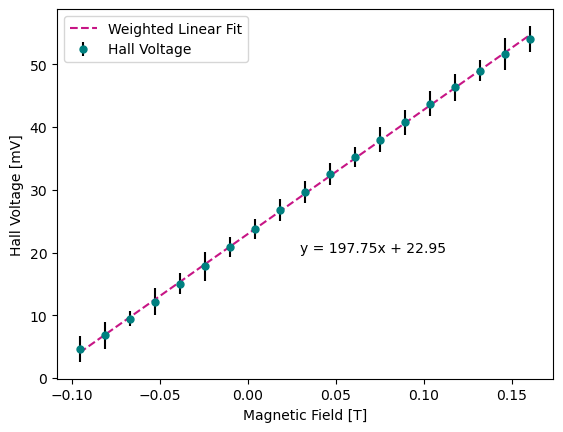

In [57]:
# Magnetic Field

# probe temp = 31.4 C, probe current = 5 mA

V0_B = 149.1
B = p1[0]*B_I+p1[1]
V_B = (np.abs(V1_B-V0_B)+np.abs(V2_B-V0_B))/2
V_std_B = V1_std_B+V2_std_B

p2, c2 = np.polyfit(B, V_B, 1, w=1/V_std_B, cov=True)

s2 = p2[0]
s2_err = np.sqrt(c2[0][0])

print(f's2 = {s2}+-{s2_err}')

plt.errorbar(B, V_B, yerr=V_std_B*10, color='teal', ecolor='k', ms=5, fmt='o', label='Hall Voltage')
plt.plot(B, polyval(p2, B), color='mediumvioletred', ls='--', label='Weighted Linear Fit')
plt.text(0.03, 20, f'y = {np.round(p2[0], 2)}x + {np.round(p2[1], 2)}')
plt.xlabel('Magnetic Field [T]')
plt.ylabel('Hall Voltage [mV]')
plt.legend()
plt.show()

In [58]:
t = 0.5e-3
I_H = 5e-3
e = 1.6e-19
rho = 0.10

R_H = s2*1e-3*t/I_H
R_H_err = s2_err*1e-3*t/I_H

n = 1/(R_H*e)
n_err = 1/(R_H_err*e)

mu = R_H/rho
mu_err = R_H_err/rho

print(f'Hall Coefficient = {R_H} +- {R_H_err}')
print(f'Charge Carrier Density = {n} +- {n_err}')
print(f'Charge Mobility = {mu} +- {mu_err}')

Hall Coefficient = 0.019774614284616986 +- 9.026505011907196e-05
Charge Carrier Density = 3.160617906394252e+20 +- 6.924053098907489e+22
Charge Mobility = 0.19774614284616984 +- 0.0009026505011907195


s3 = 5.032441463575574+-0.16943329111401156


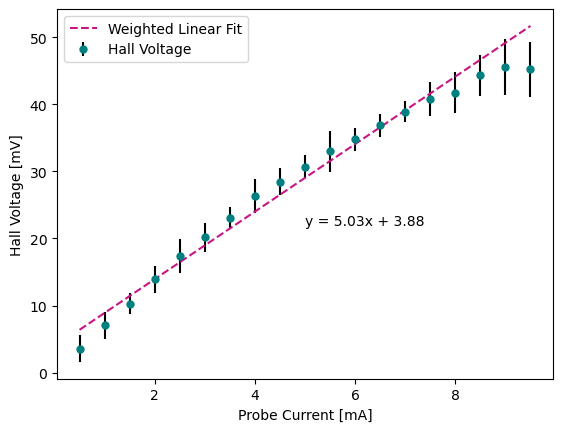

In [59]:
# Probe Current

# probe temp = 30.5 C, mag current = 2A

V_I = (np.abs(V1_I-V0_I)+np.abs(V2_I-V0_I))/2
V_std_I = V1_std_I+V2_std_I

p3, c3 = np.polyfit(I, V_I, 1, w=1/V_std_I, cov=True)

s3 = p3[0]
s3_err = np.sqrt(c3[0][0])

print(f's3 = {s3}+-{s3_err}')

plt.errorbar(I, V_I, yerr=V_std_I*10, color='teal', ecolor='k', ms=5, fmt='o', label='Hall Voltage')
plt.plot(I, polyval(p3, I), color='mediumvioletred', ls='--', label='Weighted Linear Fit')
plt.text(5, 22, f'y = {np.round(p3[0], 2)}x + {np.round(p3[1], 2)}')
plt.xlabel('Probe Current [mA]')
plt.ylabel('Hall Voltage [mV]')
plt.legend()
plt.show()

In [68]:
B_H = p1[0]*2+p1[1]

del_B = B_H*(s1_err/s1)+np.sqrt(c1[1][1])

R_H = s3*t/B_H
R_H_err = s3_err*t/B_H

n = 1/(R_H*e)
n_err = 1/(R_H_err*e)

mu = R_H/rho
mu_err = R_H_err/rho

print(f'Hall Coefficient = {R_H} +- {R_H_err}')
print(f'Charge Carrier Density = {n} +- {n_err}')
print(f'Charge Mobility = {mu} +- {mu_err}')

Hall Coefficient = 0.060115352720832814 +- 0.0020239762611632003
Charge Carrier Density = 1.0396678580634993e+20 +- 3.087980881953655e+21
Charge Mobility = 0.6011535272083282 +- 0.020239762611632


0.10237892881794992


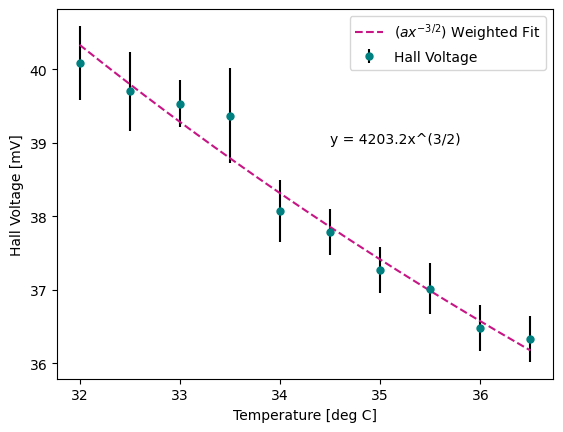

In [49]:
# Temperature 

# probe current = 5 mA, mag current = 2.85 A

B_h = p1[0]*2.85+p1[1]

print(B_h)

V_T = (np.abs(V1_T-V0_T)+np.abs(V2_T-V0_T))/2
V_std_T = V1_std_T+V2_std_T

def line(x, a, b):
    return a*x**(-3/2)+b

t = np.linspace(T[0], T[-1], 1000)

p4, c4 = curve_fit(line, T, V_T, sigma=V_std_T, absolute_sigma=True)

plt.errorbar(T, V_T, yerr=V_std_T*2, color='teal', ecolor='k', ms=5, fmt='o', label='Hall Voltage')
plt.plot(t, p4[0]*t**(-3/2)+p4[1], color='mediumvioletred', ls='--', label=r'$(ax^{-3/2})$ Weighted Fit')
plt.text(34.5, 39, f'y = {np.round(p4[0], 2)}x^(3/2)')
plt.xlabel('Temperature [deg C]')
plt.ylabel('Hall Voltage [mV]')
plt.legend()
plt.show()